## Data visualisation

### Imports and constant definitions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import random
from functools import cmp_to_key
from sklearn import cluster
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import dendrogram, linkage
WORKING_DIRECTORY = "/Users/LycaN/Sites/deeplearning/project2_signature-recognition"
os.chdir(WORKING_DIRECTORY)

### Display a signature
display the signature n°y of the signatory n°x 

In [ ]:
def display_asignature(x,y) : # display the signature n°y of the signatory n°x 
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    print("Displaying the signature n°" + str(y) + " of the signatory n°" + str(x))
    df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
    X = df.X.to_numpy()
    Y = df.Y.to_numpy()
    P = df.P.to_numpy()
    idxs =  np.where(P==0)[0]
    
    
    pressure = P[0] > 0

    
    Xs_P, Ys_P = [],[] # sub arrays with pressure
    Xs_nP, Ys_nP = [],[] # sub arrays without pressure
    
    asubX,asubY = [],[] # temp array
    pressure = P[0] > 0 # init boolean pressure
    
    
    # Sub array defining
    for i in range(len(X)) :
        asubX.append(X[i])
        asubY.append(Y[i])
        if (i<len(X)-1) :
            nextpressure = P[i+1] > 0
            if pressure != nextpressure : # breaking point of the array in sub array
                if pressure :
                    Xs_P.append(asubX)
                    Ys_P.append(asubY)
                    asubX,asubY = [],[]
                    
                else :
                    Xs_nP.append(asubX)
                    Ys_nP.append(asubY)
                    asubX,asubY = [],[]
                pressure = nextpressure
    
    
    if pressure :
        Xs_P.append(asubX)
        Ys_P.append(asubY)
        asubX,asubY = [],[]
                    
    else :
        Xs_nP.append(asubX)
        Ys_nP.append(asubY)
        asubX,asubY = [],[]
                
    # Plotting lines (Trajectory with pressure)           
    for j in range(len(Xs_P)) :
        plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
    
    for k in range(len(Xs_nP)) :
        plt.plot(Xs_nP[k],Ys_nP[k], color = 'red', linestyle='dashed')
    
    
    plt.axis('equal')
    plt.show()
        
        
                    
        
      
 

    
    
    

    
    
    


In [ ]:
display_asignature(15,20)

### Displaying the set of signature of a signatory
display all the signatures of the signatory n°x 

In [ ]:
def display_signatures(x) : # display all the signatures of the signatory n°x 
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    print("Displaying the signatures of the signatory n°" + str(x))
    
    plt.figure(figsize=(20,10))
    
    for y in range(25) :
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
        if pressure : 
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        plt.subplot(5,5,y+1)

       
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'red', linestyle='dashed')
        
        
        
    
    


    plt.axis('equal')
    plt.show()


In [ ]:
display_signatures(17)

## Experimental work

## Part 1 : 

### Mean complexity of a signatory

In [ ]:
def mean_complexity(x,ng) : # compute the mean complexity of signatory n°x (from 0 to 99) with ng = 4,8,24
    os.chdir(WORKING_DIRECTORY)
    os.chdir("complexity")
   # df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
    df = pd.read_csv(str(ng)+'G.txt', header = None, delimiter = "\t")
    C = df.to_numpy()
    return C[x].mean()
    

    
    
    

In [ ]:
mean_complexity(0,4)

In [ ]:
def all_mean_complexity(ng) :  # compute and display all the mean complexity of signatory with ng = 4,8,24
    # print("signatory n° \t | \tmean complexity")
    mC = []
    for x in range(100) :
        # print(str(x) + " \t\t | \t" + str(mean_complexity(x,ng)))
        mC.append(["signatory n°" + str(x),mean_complexity(x,ng)])
    return mC
    
        
    
    

In [ ]:
all_mean_complexity(4)

### Unsupervised classification
k = 3

In [ ]:
def display_clustering(tab) :
    print("signatory n° \t\t | \tmean complexity \t\t | \tclass")
    for i in range(len(tab)) :
        print(str(tab[i][0]) + " \t\t | \t" + str(tab[i][1]) + " \t\t | \t" + str(tab[i][2]))
    Xr = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Yr = [0 for i in range(len(tab)) if tab[i][2] == 0]
    nr = len(Xr)
    Xg = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Yg = [0 for i in range(len(tab)) if tab[i][2] == 1]
    ng = len(Xg)
    Xb = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Yb = [0 for i in range(len(tab)) if tab[i][2] == 2]
    nb = len(Xb)
    n = nb + nr + ng
    plt.figure(figsize=(20,10))
    plt.title('Clustering',)
    plt.xlabel('Mean complexity')
    plt.scatter(Xr,Yr, c='red', marker='x')
    plt.legend(['A simple line'])
    plt.scatter(Xg,Yg, c='green', marker='x')
    plt.scatter(Xb,Yb, c='blue', marker='x')
    plt.legend(['red - cluster 0 : ' + str(nr) + ' signatories','green - cluster 1 : ' + str(ng) + ' signatories','blue - cluster 2 : ' + str(nb) + ' signatories'])

    plt.figure(figsize=(10,8))
    D = [nr/n,ng/n,nb/n] # Distributution
    plt.bar([0], [D[0]], 1, color='red' )
    plt.bar([1], [D[1]], 1, color='green' )
    plt.bar([2], [D[2]], 1, color='blue' )
    plt.legend(['red - cluster 0 : ' + str(round((nr/n)*100)) + '% of signatories','green - cluster 1 : ' + str(round((ng/n)*100)) + '% of signatories','blue - cluster 2 : ' + str(round((nb/n)*100)) + '% of signatories'])

    plt.title('Distribution between clusters')
    
    plt.show()
    

### Method 1 : K-Means with separate ng

In [578]:
def compare(x, y):
    return x[1] - y[1]


def k_means(ng) :
    mC = all_mean_complexity(ng)
    variables = [[v[1]] for v in mC]
    kmeans = cluster.KMeans(n_clusters=3).fit(variables) 
    for i in range(len(mC)):
        mC[i].append(kmeans.labels_[i])
    return (sorted(mC, key=cmp_to_key(compare)),kmeans.cluster_centers_)
    
    
    

In [577]:
display_clustering(k_means(24))

AttributeError: 'function' object has no attribute 'cluster_centers_'

### Method 2 : K-Medioid with separate ng

In [579]:
def compare(x, y):
    return x[1] - y[1]


def k_medoids(ng) :
    mC = all_mean_complexity(ng)
    variables = [[v[1]] for v in mC]
    kmedoids = KMedoids(n_clusters=3).fit(variables) 
    for i in range(len(mC)):
        mC[i].append(kmedoids.labels_[i])
    return (sorted(mC, key=cmp_to_key(compare)),kmedoids.cluster_centers_)
    

In [ ]:
display_clustering(k_medoids(4))

### Clustering comparison

In [587]:
def display_comparison(algo) : #algo = k_means or k_medoids 
    plt.figure(figsize=(20,10))
    (tab,centroid4) = algo(4)
    n =len(tab)
    
    plt.subplot(3,1,1)
    R4 = [v for v in tab if v[2] == 0]
    G4 = [v for v in tab if v[2] == 1]
    B4 = [v for v in tab if v[2] == 2]
    
    X4r = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Y4r = [0 for i in range(len(tab)) if tab[i][2] == 0]
    X4g = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Y4g = [0 for i in range(len(tab)) if tab[i][2] == 1]
    X4b = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Y4b = [0 for i in range(len(tab)) if tab[i][2] == 2]
    
    n4r = len(X4r)
    n4g = len(X4g)
    n4b = len(X4b)

    plt.title('Clustering visualization 4',)
    
    
    
    
    plt.scatter(X4r,Y4r, c='red', marker='x')
    plt.scatter(X4g,Y4g, c='green', marker='x')
    plt.scatter(X4b,Y4b, c='blue', marker='x')
    plt.scatter(centroid4,[0,0,0], c='black', marker='d')
    plt.legend(['red - cluster 0 : ' + str(n4r) + ' signatories','green - cluster 1 : ' + str(n4g) + ' signatories','blue - cluster 2 : ' + str(n4b) + ' signatories'])
    
    
    (tab,centroid8) = algo(8)
    plt.subplot(3,1,2)
    
    R8 = [v for v in tab if v[2] == 0]
    G8 = [v for v in tab if v[2] == 1]
    B8 = [v for v in tab if v[2] == 2]
    
    X8r = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Y8r = [0 for i in range(len(tab)) if tab[i][2] == 0]
    X8g = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Y8g = [0 for i in range(len(tab)) if tab[i][2] == 1]
    X8b = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Y8b = [0 for i in range(len(tab)) if tab[i][2] == 2]
    
    n8r = len(X8r)
    n8g = len(X8g)
    n8b = len(X8b)

    plt.title('Clustering visualization 8',)
   
    plt.scatter(X8r,Y8r, c='red', marker='x')
    plt.scatter(X8g,Y8g, c='green', marker='x')
    plt.scatter(X8b,Y8b, c='blue', marker='x')
    plt.scatter(centroid8,[0,0,0], c='black', marker='d')
    plt.legend(['red - cluster 0 : ' + str(n8r) + ' signatories','green - cluster 1 : ' + str(n8g) + ' signatories','blue - cluster 2 : ' + str(n8b) + ' signatories'])
    
    (tab,centroid24) = algo(24)
    plt.subplot(3,1,3)
    
    R24 = [v for v in tab if v[2] == 0]
    G24 = [v for v in tab if v[2] == 1]
    B24 = [v for v in tab if v[2] == 2]
    
    X24r = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 0]
    Y24r = [0 for i in range(len(tab)) if tab[i][2] == 0]
    X24g = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 1]
    Y24g = [0 for i in range(len(tab)) if tab[i][2] == 1]
    X24b = [tab[i][1] for i in range(len(tab)) if tab[i][2] == 2]
    Y24b = [0 for i in range(len(tab)) if tab[i][2] == 2]
    n24r = len(X24r)
    n24g = len(X24g)
    n24b = len(X24b)
    
    
    plt.title('Clustering visualization 24',)
    plt.xlabel('Mean complexity')
    plt.scatter(X24r,Y24r, c='red', marker='x')
    plt.scatter(X24g,Y24g, c='green', marker='x')
    plt.scatter(X24b,Y24b, c='blue', marker='x')
    plt.scatter(centroid24,[0,0,0], c='black', marker='d')
    plt.legend(['red - cluster 0 : ' + str(n24r) + ' signatories','green - cluster 1 : ' + str(n24g) + ' signatories','blue - cluster 2 : ' + str(n24b) + ' signatories'])
    
    ## Diagram

    
    plt.figure(figsize=(20,10))
    
    plt.subplot(1,3,1)

    plt.bar([0], [n4r/n], 1, color='red' )
    plt.bar([1], [n4g/n], 1, color='green' )
    plt.bar([2], [n4b/n], 1, color='blue' )
    plt.title('Distribution between clusters 4')
    plt.legend(['red - cluster 0 : ' + str(round((n4r/n)*100)) + '% of signatories','green - cluster 1 : ' + str(round((n4g/n)*100)) + '% of signatories','blue - cluster 2 : ' + str(round((n4b/n)*100)) + '% of signatories'])
    
    plt.subplot(1,3,2)
    
    plt.bar([0], [n8r/n], 1, color='red' )
    plt.bar([1], [n8g/n], 1, color='green' )
    plt.bar([2], [n8b/n], 1, color='blue' )
    plt.title('Distribution between clusters 8')
    plt.legend(['red - cluster 0 : ' + str(round((n8r/n)*100)) + '% of signatories','green - cluster 1 : ' + str(round((n8g/n)*100)) + '% of signatories','blue - cluster 2 : ' + str(round((n8b/n)*100)) + '% of signatories'])
    
    plt.subplot(1,3,3)
    
    plt.bar([0], [n24r/n], 1, color='red' )
    plt.bar([1], [n24g/n], 1, color='green' )
    plt.bar([2], [n24b/n], 1, color='blue' )
    plt.title('Distribution between clusters 24')
    plt.legend(['red - cluster 0 : ' + str(round((n24r/n)*100)) + '% of signatories','green - cluster 1 : ' + str(round((n24g/n)*100)) + '% of signatories','blue - cluster 2 : ' + str(round((n24b/n)*100)) + '% of signatories'])
    
    ## Signature comparison

    batch = 5
    
    # ng = 4
    
    Sr = random.sample(R4, batch)
    Sg = random.sample(G4, batch)
    Sb = random.sample(B4, batch)
    
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    plt.figure(figsize=(20,10))
    
    # Cluster 0
    for ix in range(len(Sr)) :
        plt.subplot(3,batch,ix+1)
        x=Sr[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'red')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sr[ix][1]))])
        plt.axis('equal')
    

   # Cluster 1
    for ix in range(len(Sg)) :
        plt.subplot(3,batch,batch+ix+1)
        x=Sg[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'green')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sg[ix][1]))])
        plt.axis('equal')

    

   # Cluster 2
    for ix in range(len(Sb)) :
        plt.subplot(3,batch,2*batch+ix+1)
        x=Sb[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
        
        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sb[ix][1]))])
        plt.axis('equal')
        
# ng = 8
    
    Sr = random.sample(R8, batch)
    Sg = random.sample(G8, batch)
    Sb = random.sample(B8, batch)
    
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    plt.figure(figsize=(20,10))
    
    # Cluster 0
    for ix in range(len(Sr)) :
        plt.subplot(3,batch,ix+1)
        x=Sr[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'red')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sr[ix][1]))])
        plt.axis('equal')
    

   # Cluster 1
    for ix in range(len(Sg)) :
        plt.subplot(3,batch,batch+ix+1)
        x=Sg[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'green')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sg[ix][1]))])
        plt.axis('equal')

    

   # Cluster 2
    for ix in range(len(Sb)) :
        plt.subplot(3,batch,2*batch+ix+1)
        x=Sb[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
        
        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sb[ix][1]))])
        plt.axis('equal')
        
# ng = 24
    
    Sr = random.sample(R24, batch)
    Sg = random.sample(G24, batch)
    Sb = random.sample(B24, batch)
    
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    plt.figure(figsize=(20,10))
    
    # Cluster 0
    for ix in range(len(Sr)) :
        plt.subplot(3,batch,ix+1)
        x=Sr[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'red')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sr[ix][1]))])
        plt.axis('equal')
    

   # Cluster 1
    for ix in range(len(Sg)) :
        plt.subplot(3,batch,batch+ix+1)
        x=Sg[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'green')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sg[ix][1]))])
        plt.axis('equal')

    

   # Cluster 2
    for ix in range(len(Sb)) :
        plt.subplot(3,batch,2*batch+ix+1)
        x=Sb[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
        
        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sb[ix][1]))])
        plt.axis('equal')
        
        ## END Signature comparison

    
    plt.show()

In [583]:
def display_signature_comparison(algo,ng,batch) : # #algo = k_means or k_medoids and ng = 4, 8 or 24

    
    tab = algo(ng)
    R = [v for v in tab if v[2] == 0]
    G = [v for v in tab if v[2] == 1]
    B = [v for v in tab if v[2] == 2]

    
    Sr = random.sample(R, batch)
    Sg = random.sample(G, batch)
    Sb = random.sample(B, batch)
    
    os.chdir(WORKING_DIRECTORY)
    os.chdir("DB")
    plt.figure(figsize=(20,10))
    
    # Cluster 0
    for ix in range(len(Sr)) :
        plt.subplot(3,batch,ix+1)
        x=Sr[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'red')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sr[ix][1]))])
        plt.axis('equal')
    

   # Cluster 1
    for ix in range(len(Sg)) :
        plt.subplot(3,batch,batch+ix+1)
        x=Sg[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'green')

        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sg[ix][1]))])
        plt.axis('equal')

    

   # Cluster 2
    for ix in range(len(Sb)) :
        plt.subplot(3,batch,2*batch+ix+1)
        x=Sb[ix][0][12:]
        y=0
  
        df = pd.read_csv(str(x)+'v'+str(y)+'.txt', header = None, delimiter = " ", names = ["X","Y","P","Az","Al"])
        X = df.X.to_numpy()
        Y = df.Y.to_numpy()
        P = df.P.to_numpy()
        idxs =  np.where(P==0)[0]


        pressure = P[0] > 0


        Xs_P, Ys_P = [],[] # sub arrays with pressure
        Xs_nP, Ys_nP = [],[] # sub arrays without pressure

        asubX,asubY = [],[] # temp array
        pressure = P[0] > 0 # init boolean pressure


        # Sub array defining
        for i in range(len(X)) :
            asubX.append(X[i])
            asubY.append(Y[i])
            if (i<len(X)-1) :
                nextpressure = P[i+1] > 0
                if pressure != nextpressure : # breaking point of the array in sub array
                    if pressure :
                        Xs_P.append(asubX)
                        Ys_P.append(asubY)
                        asubX,asubY = [],[]

                    else :
                        Xs_nP.append(asubX)
                        Ys_nP.append(asubY)
                        asubX,asubY = [],[]
                    pressure = nextpressure
                    


        if pressure :
            Xs_P.append(asubX)
            Ys_P.append(asubY)
            asubX,asubY = [],[]

        else :
            Xs_nP.append(asubX)
            Ys_nP.append(asubY)
            asubX,asubY = [],[]

        # Plotting lines (Trajectory with pressure)           
        for j in range(len(Xs_P)) :
            plt.plot(Xs_P[j],Ys_P[j], color = 'blue')
        
        for k in range(len(Xs_nP)) :
            plt.plot(Xs_nP[k],Ys_nP[k], color = 'black', linestyle='dashed')
        plt.legend(['C=' + str(round(Sb[ix][1]))])
        plt.axis('equal')
    
    ## END Signature comparison
    
    
    plt.show()

        
        
        
    
    

In [ ]:
display_signature_comparison(k_means,24,5)

### Kmeans

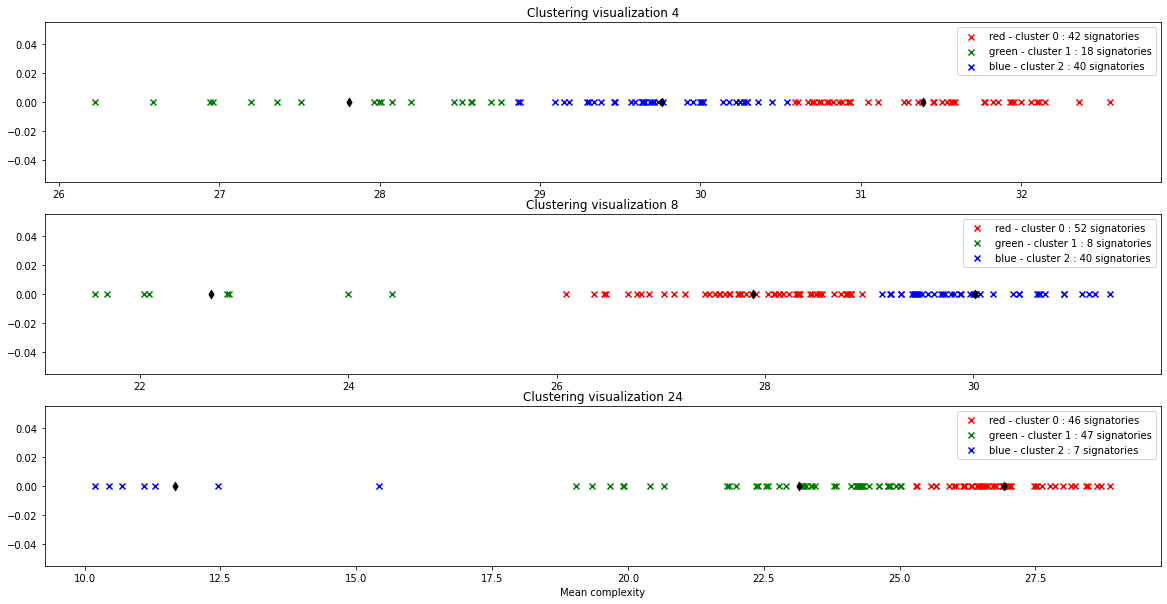

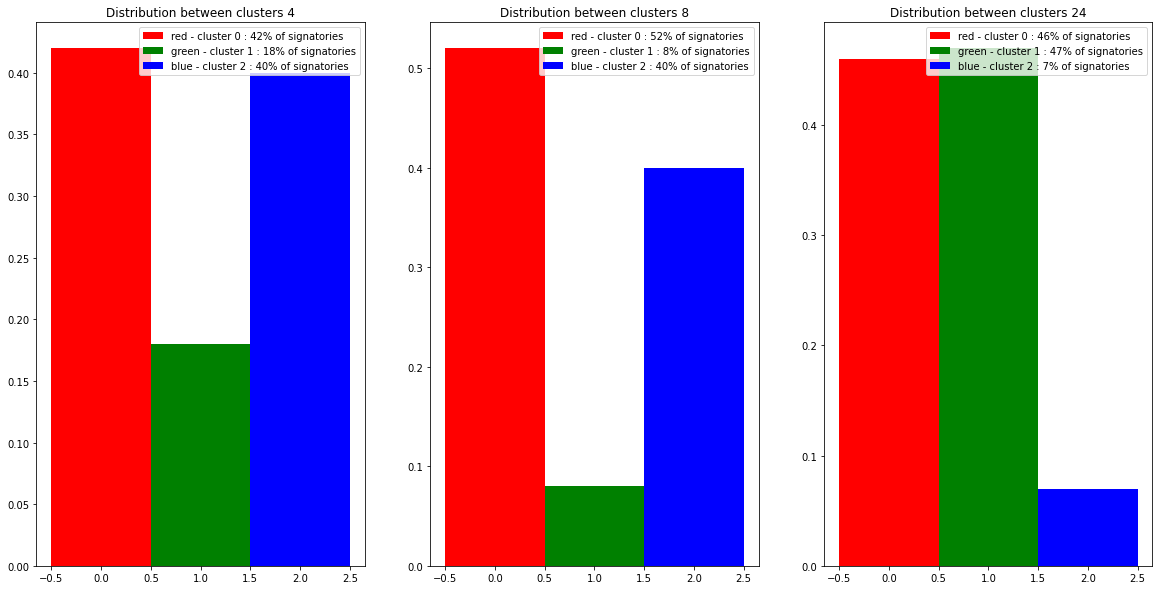

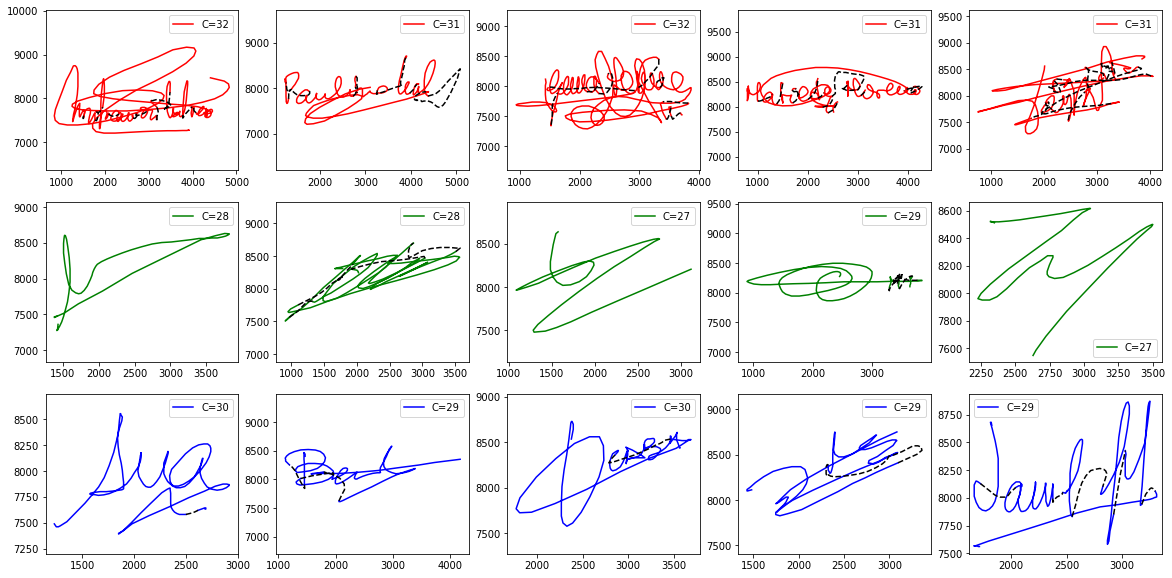

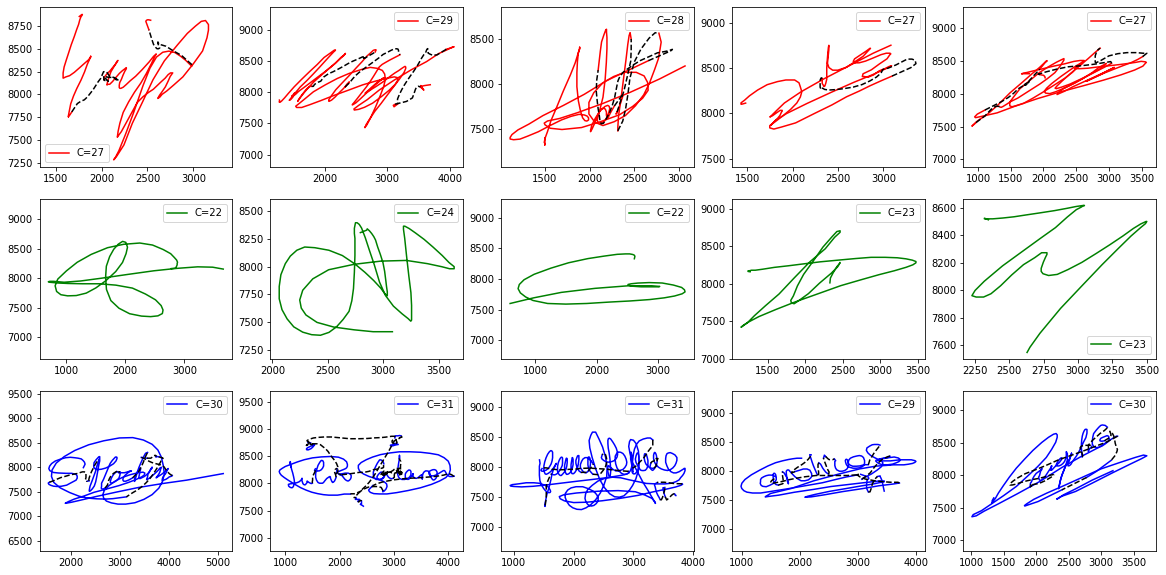

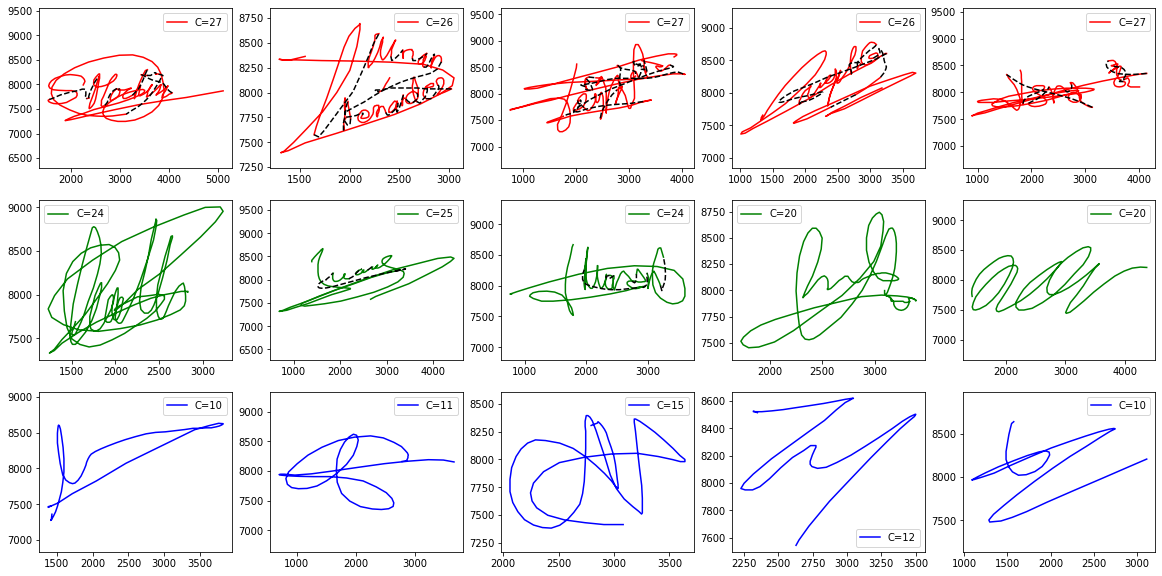

In [588]:
display_comparison(k_means)

### Kmedoid

[[28.46388959]
 [30.22229146]
 [31.77120513]]


ValueError: Sample larger than population or is negative

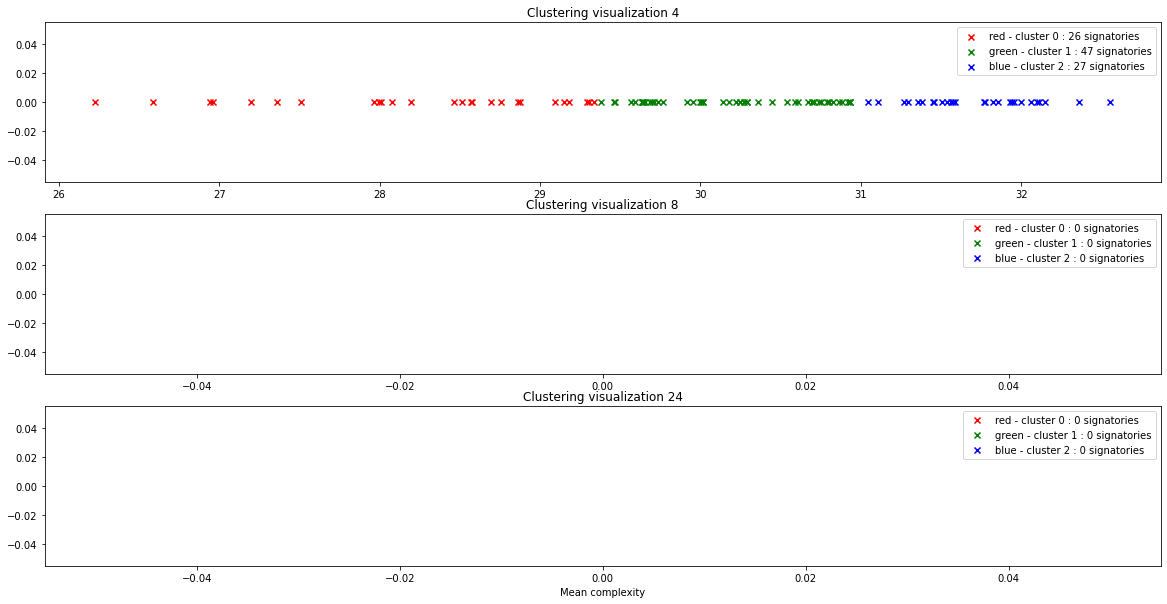

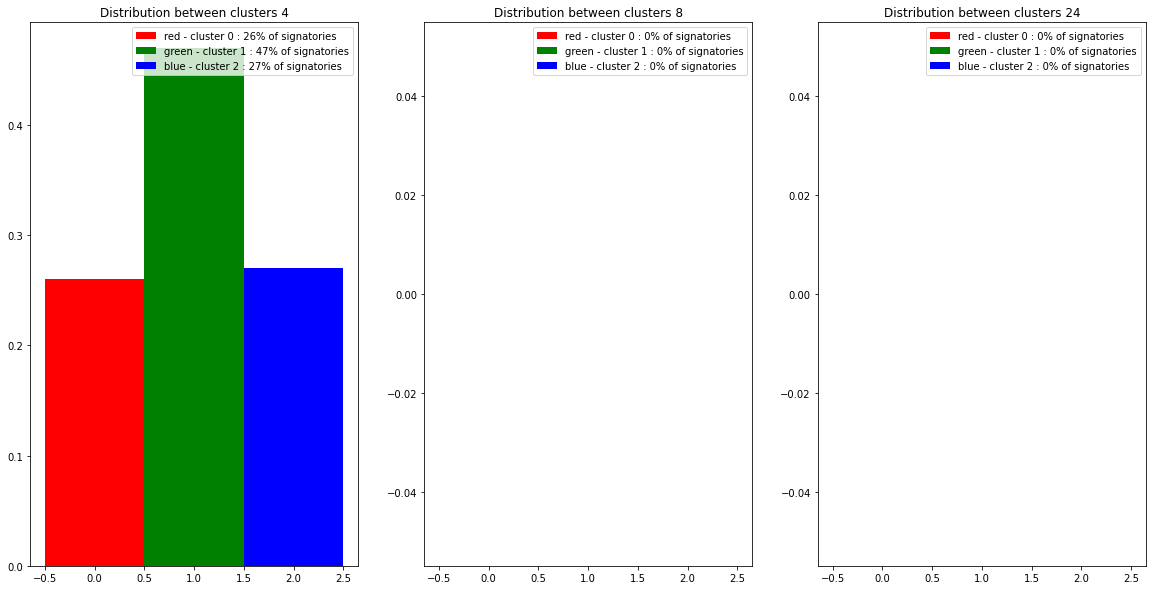

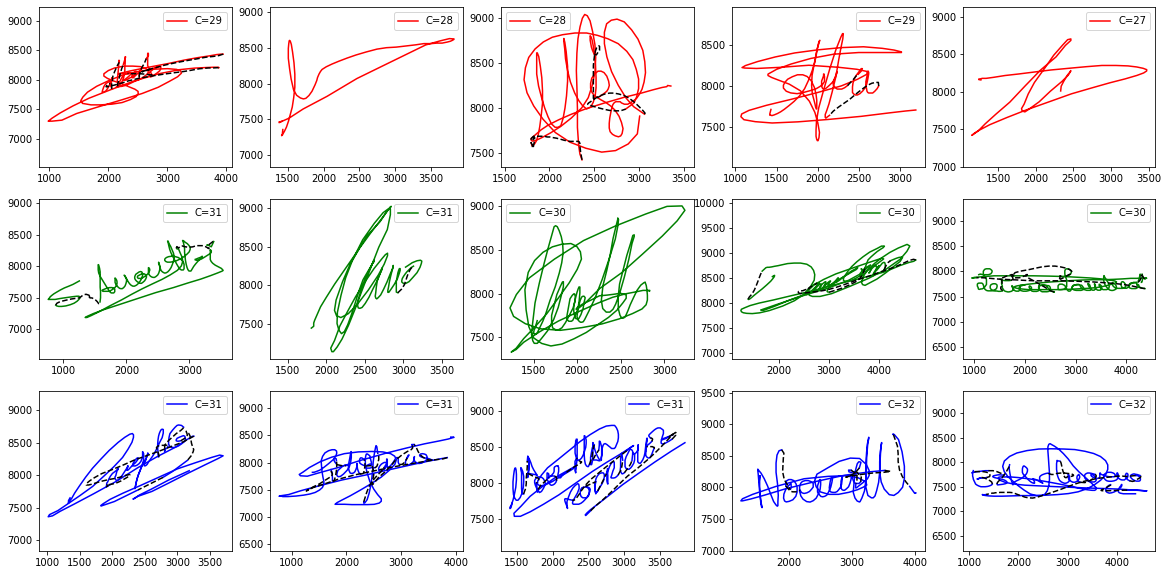

In [575]:
display_comparison(k_medoids)